In [2]:
%gui qt

In [3]:
import napari
import imageio
import numpy as np
from pathlib import Path

/home/dbs660/anaconda3/envs/idp/lib/python3.8/site-packages/napari/_qt/__init__.py:37: UserWarning: 
    napari was tested with QT library `>=5.12.3`.
    The version installed is 5.9.7. Please report any issues with this
    specific QT version at https://github.com/Napari/napari/issues.
    
  warn(message=warn_message)


In [4]:
viewer = napari.Viewer()

In [12]:
data_dir = Path('/home/dbs660/PycharmProjects/ptycho_data_analysis/data_synced/1dec2021/scangrid_2')

In [137]:
# /home/dbs660/PycharmProjects/ptycho_data_analysis/data_synced/1dec2021/random_nanostage_movements_1/
npz = np.load(data_dir/'move_nano_fix_micro.npz')
print(npz.files)
positions = npz['positions after']#[:,4:6].T
positions_before = npz['positions before']
raw_positions = npz['raw positions']
dpos = positions - positions[:,0:1]
npz.close()

['target y', 'target x', 'actual_positions', 'positions before', 'positions after', 'raw positions']


In [122]:
viewer.add_image(images)

<Image layer 'images [7]' at 0x7f254db08be0>

In [123]:
from skimage.registration import phase_cross_correlation
from tqdm import tqdm

In [124]:
shifts = [phase_cross_correlation(images[0], im, upsample_factor=10)[0] for im in tqdm(images)]
shifts = np.array(shifts).T

100%|██████████| 100/100 [00:57<00:00,  1.75it/s]


In [125]:
import matplotlib.pyplot as plt

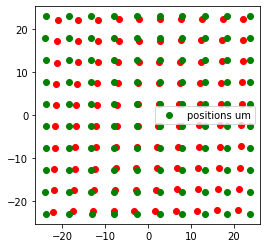

In [126]:
shifts_um = 6.33/16.9 * shifts
shifts_um -= shifts_um.mean(axis=1, keepdims=True)

positions_um = dpos*1e3
positions_um -= positions_um.mean(axis=1, keepdims=True)
ax = plt.gca()
plt.plot(shifts_um[0], shifts_um[1], 'ro')
plt.plot(positions_um[1], positions_um[0], 'go', label='positions um')
ax.set_aspect(1)
plt.legend()

1.2218352148355667


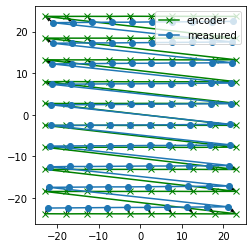

In [127]:

def fitfunc(coefficients, plot=False):
    py, px = positions_um[::]
    py = py * coefficients[0] + coefficients[2]
    px = px * coefficients[1] + coefficients[3]
    positions_warped = np.vstack([py, px])
    if plot:
        dy = shifts_um[0]-py
        dx = shifts_um[1]-px

        ax = plt.subplot(111)
        plt.quiver(shifts_um[0], shifts_um[1], -dy, -dx, angles='xy',
                   scale=1, scale_units='xy')
        ax.plot(py, px ,'g-x', label='encoder')
        ax.plot(shifts_um[0], shifts_um[1], '-o',label='measured', alpha=1)
        plt.legend()
        ax.set_aspect(1)
    diff = positions_warped - shifts_um
    return np.hypot(diff[0], diff[1]).mean()

from scipy.optimize import fmin
print(fitfunc([1,1, 0, 0], plot=True))

Optimization terminated successfully.
         Current function value: 0.337281
         Iterations: 45
         Function evaluations: 86


0.39

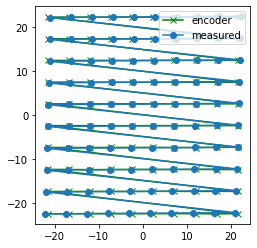

In [128]:
final = fmin(fitfunc, [1,1, 0, 0])
fitfunc(final, plot=True)
final
39/100

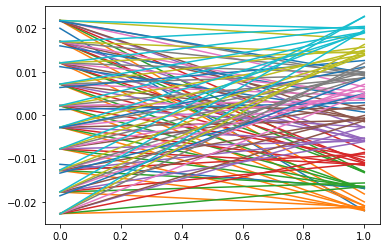

In [134]:

plt.plot(positions_before-positions_before.mean(1, keepdims=True))

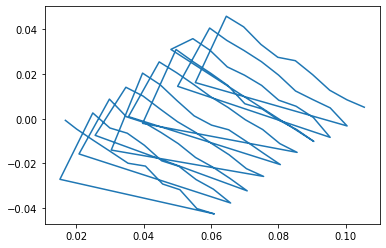

In [136]:
dpos = positions - positions_before
plt.plot(dpos[0], dpos[1])

In [138]:

raw_positions

array([[7.98000000e-03, 7.76000000e-03, 7.59727903e+01, 1.62375245e-02,
        1.51544980e-02, 1.53493577e-02, 7.59824000e+01, 7.90000000e-03],
       [7.90000000e-03, 7.60000000e-03, 7.59746578e+01, 2.02685556e-02,
        2.02658668e-02, 1.53424005e-02, 7.59824000e+01, 7.88000000e-03],
       [7.98000000e-03, 7.60000000e-03, 7.59746574e+01, 2.54083328e-02,
        2.53723254e-02, 1.53454926e-02, 7.59824000e+01, 7.90000000e-03],
       [7.92000000e-03, 7.60000000e-03, 7.59746564e+01, 3.05036073e-02,
        3.04840448e-02, 1.53483914e-02, 7.59824000e+01, 7.88000000e-03],
       [7.96000000e-03, 7.60000000e-03, 7.59746513e+01, 3.56005185e-02,
        3.55924909e-02, 1.53486620e-02, 7.59824000e+01, 7.88000000e-03],
       [7.90000000e-03, 7.60000000e-03, 7.59746511e+01, 3.69050447e-02,
        4.07015604e-02, 1.53418981e-02, 7.59824000e+01, 7.90000000e-03],
       [7.90000000e-03, 7.60000000e-03, 7.59746491e+01, 4.49519871e-02,
        4.58135137e-02, 1.53495510e-02, 7.59824000e+01, 7.